In [31]:
import constants, Plotting, os, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
folder = constants.folder
nameBase= "folder.format('AbundancePlots/')"

physical = constants.physical
species= constants.species

In [33]:
singleDf=True
tipo=constants.SHOCK
df= Plotting.buildDataframe(tipo, folder, physical, species)
dfFinal= Plotting.localAbundanceDataframe(df, species, physical, tipo)

df['Time']== 

In [54]:
maxmethDf=df[df['CH3OH']==df.groupby('runName')['CH3OH'].transform('max')]

In [63]:
maxmethDf.groupby('runName')['Time'].transform('max')

240     1061000.000
246          58.590
745      876700.000
751           3.516
1278    1061000.000
1283        468.800
1759     964400.000
1765         46.880
2050        269.500
2537     141900.000
2761        259.100
3089    1061000.000
3093          3.516
3620    1061000.000
3861    1061000.000
3954       1078.000
4368    1061000.000
4620     276500.000
4850        894.500
5150     141900.000
5181       1055.000
5432         22.270
5949     171700.000
5977          9.375
6505     171700.000
6529          4.688
7055    1061000.000
7060          4.688
7354          9.375
7641         58.590
7906         46.880
8408    1061000.000
8457         58.590
8458         58.590
8459         58.590
8914        894.500
9036         50.390
9037         50.390
9038         50.390
9536     276500.000
Name: Time, dtype: float64

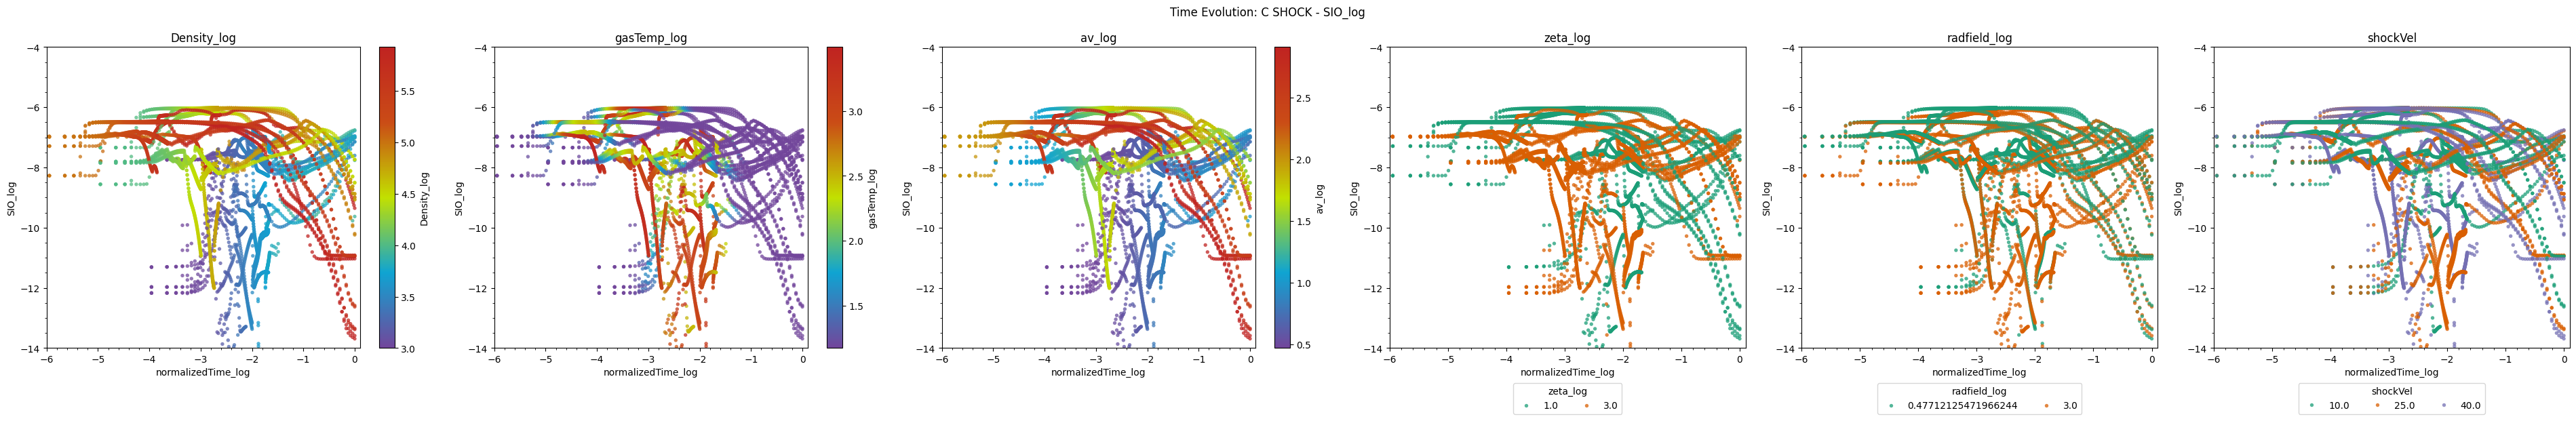

In [30]:
def timeSpecPlot(df, spec, propList, tipo, xbound=-6):        
    fig, axs = plt.subplots(1,len(propList), figsize=(8*len(propList), 6),
                            width_ratios=[11 if p in constants.varPhys[tipo] else 10 for p in propList])

    fig.subplots_adjust(top=.85,wspace=0.15, hspace=0.05)
    for i, focus in enumerate(propList):
        colormap= Plotting.myRnbw if focus in constants.varPhys[tipo] else 'Dark2'
        cont= focus in constants.varPhys[tipo]
        if focus not in constants.initparams[tipo]: focus=focus+'_log'

        ax=axs[i]
        snsax=sns.scatterplot(df, x='normalizedTime_log', y=spec, ax=ax,
                    hue=focus, palette=colormap, 
                    linewidth=0, alpha=0.75, s=15,
                    legend= None if cont else 'auto'
                    )
        ax.set_ybound(-14,-4)
        ax.minorticks_on()
        ax.set_xbound(xbound,0.1)
        ax.set_title(focus)

        if cont:
            norm = plt.Normalize(df[focus].min(), df[focus].max())
            sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
            sm.set_array([])
            snsax.figure.colorbar(sm, ax=ax, label=focus)
        else:
            sns.move_legend(ax, 'upper center', bbox_to_anchor=(0.5, -0.1), ncol=6)

    fig.suptitle(f"Time Evolution: {tipo.upper()} - {spec}", size='large', y=0.95)

timeSpecPlot(df, 'SIO_log', physical[tipo], tipo,xbound=-6)

# double

In [2]:
folder = constants.folder
nameBase= folder.format('BothPlots/')

physical = constants.physical
species= constants.species

df=Plotting.buildDataframe([constants.HOTCORE, constants.SHOCK], folder, physical, species, singleDf=False)
jointDf=Plotting.localAbundanceDataframe(df, species, physical, constants.BOTH, constants.ALL, singleDf=False)

In [20]:
jointDf[(jointDf['tipo']==constants.HOTCORE)&(jointDf['species']=='SIO'+'_log')]['abundance_log'].count()

np.int64(6871)

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(14,7))
# fig.subplots_adjust(top=0.93)
for i, tipo in enumerate([constants.HOTCORE, constants.SHOCK]):
    ax=axs[i]

    sns.scatterplot(jointDf,x='zeta_log',y='abundance_log', ax=ax,
                    hue= 'species', palette='hsv',
                    linewidth=0, alpha=0.5, s=10)
    sns.move_legend(ax, "upper center", bbox_to_anchor=(0.5, -0.1), ncols=4)
    ax.set_ybound(-14,-4)
    ax.minorticks_on()
    ax.set_title(tipo.upper())
    ax.annotate(jointDf[(jointDf['tipo']==tipo)&(jointDf['species']=='SIO'+'_log')]['abundance_log'].count(),
                xy=(0,0), xycoords='axes fraction', va='bottom', ha='left')

# Grid

Text(0.5, 0.95, 'Time Evolution: C SHOCK')

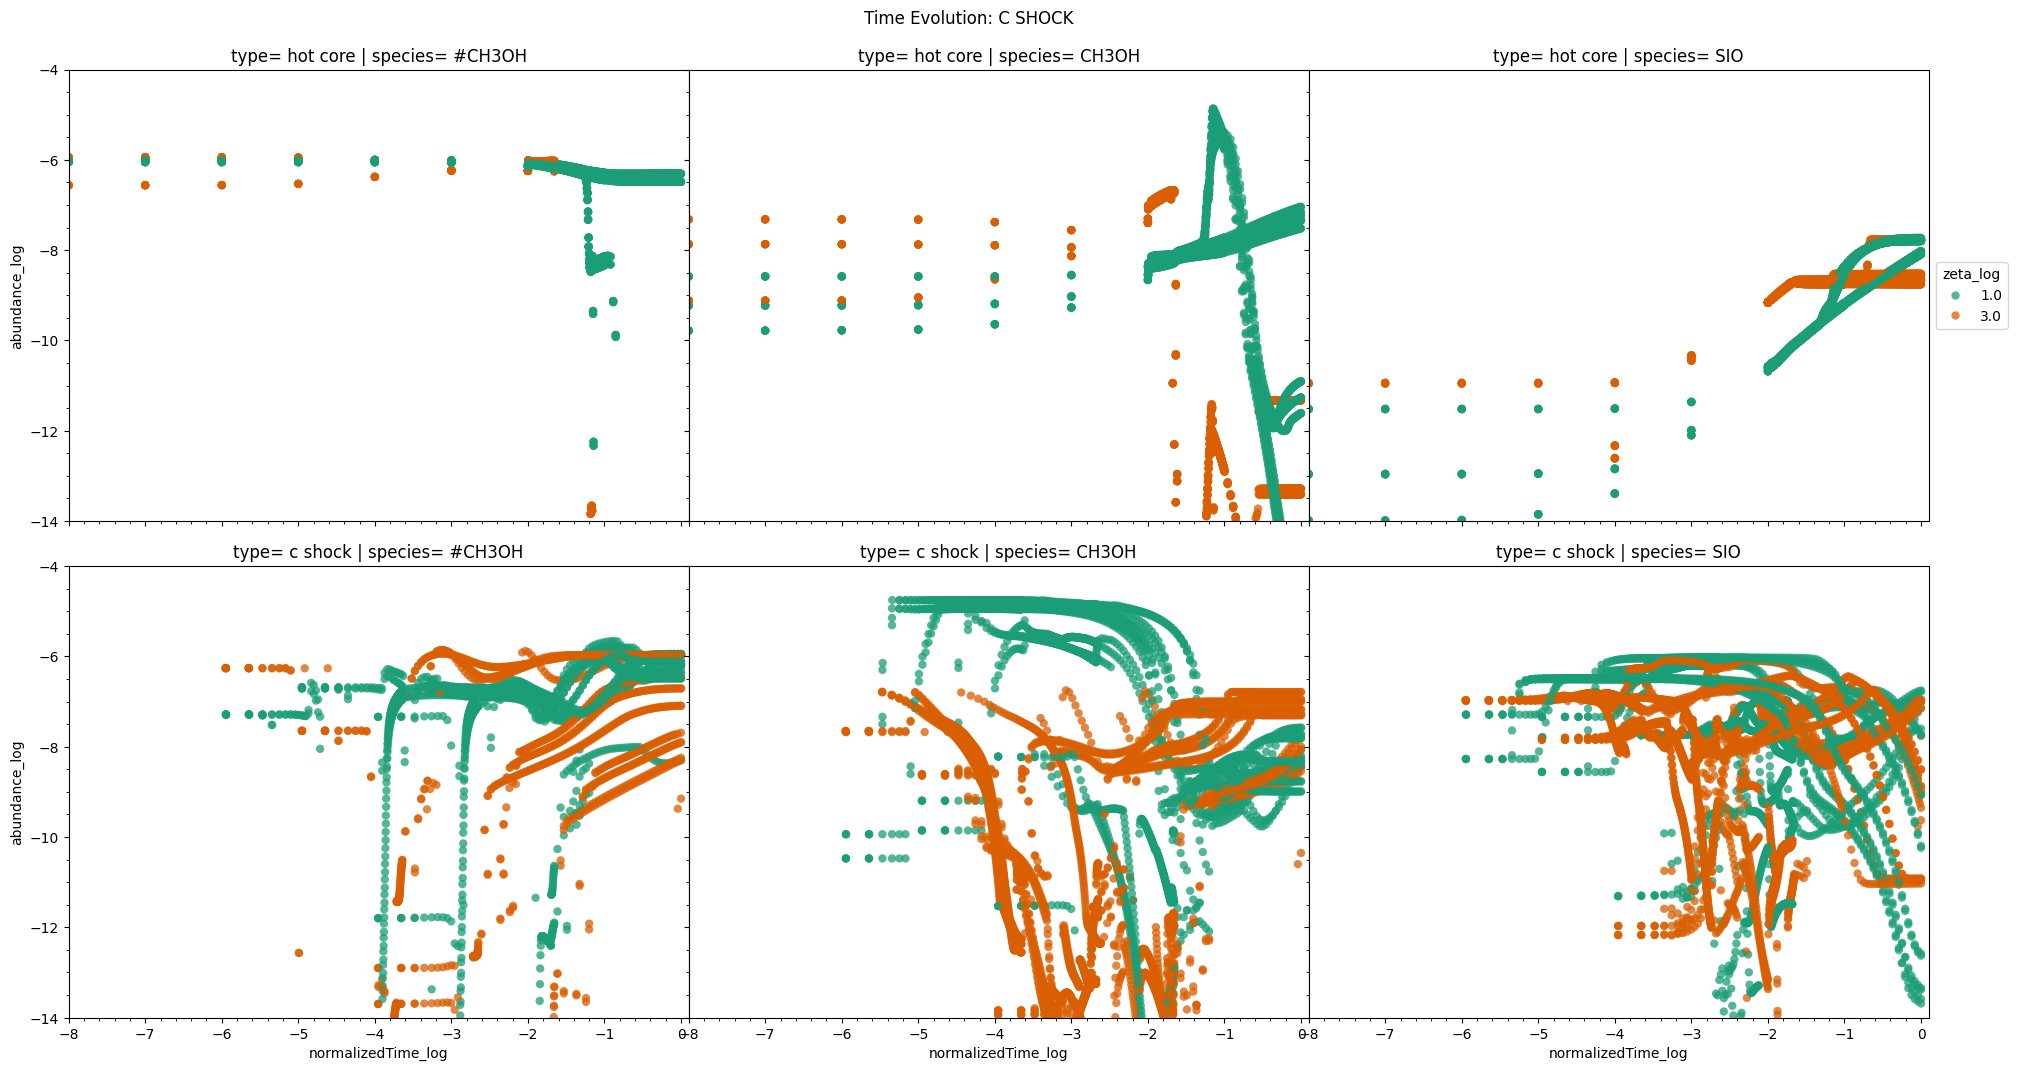

In [119]:
from matplotlib.gridspec import GridSpec
focus='zeta'
specList=species

cont= focus in constants.varPhys[constants.BOTH]
colormap= Plotting.myRnbw if cont else 'Dark2'

fig = plt.figure(figsize=(8*len(specList), 6*2))
if cont:
    gs = GridSpec(2, len(specList)+1, figure=fig, width_ratios=len(specList)*[10]+[1],
                  top=.9,wspace=0, hspace=0.1)
else: 
    gs = GridSpec(2, len(specList), figure=fig, top=.9,wspace=0, hspace=0.1)

focus=focus+'_log'
for j, tipo in enumerate([constants.HOTCORE, constants.SHOCK]):
    for i, prop in enumerate(specList):
        ax=fig.add_subplot(gs[j,i])
        snsax=sns.scatterplot(jointDf[(jointDf['tipo']==tipo)&(jointDf['species']==prop+'_log')],
                              x='normalizedTime_log', y='abundance_log', ax=ax,
                hue=focus, palette=colormap, 
                linewidth=0, alpha=0.75,
                legend= 'auto' if j==0 and i==len(specList)-1 and not cont else None
                )
        ax.set_ybound(-14,-4)
        ax.set_xbound(-8,0.1)
        ax.minorticks_on()
        if i>0:
            ax.set_ylabel(None)
            ax.set_yticklabels([])
        if j<1:
            ax.set_xlabel(None)
            ax.set_xticklabels([])
        ax.set_title(f"type= {tipo} | species= {prop}")
        if j==0 and i==len(specList)-1 and not cont: legAx=ax

if cont:
    cax=fig.add_subplot(gs[:, -1])
    norm = plt.Normalize(jointDf[focus].min(), jointDf[focus].max())
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
    sm.set_array([])
    snsax.figure.colorbar(sm, cax=cax, label=focus)
else:
    sns.move_legend(legAx, 'center left', bbox_to_anchor=(1, 0.5))

fig.suptitle(f"Time Evolution: {tipo.upper()}", size='large', y=0.95)

# Time

Text(0.5, 0.95, 'Time Evolution: C SHOCK')

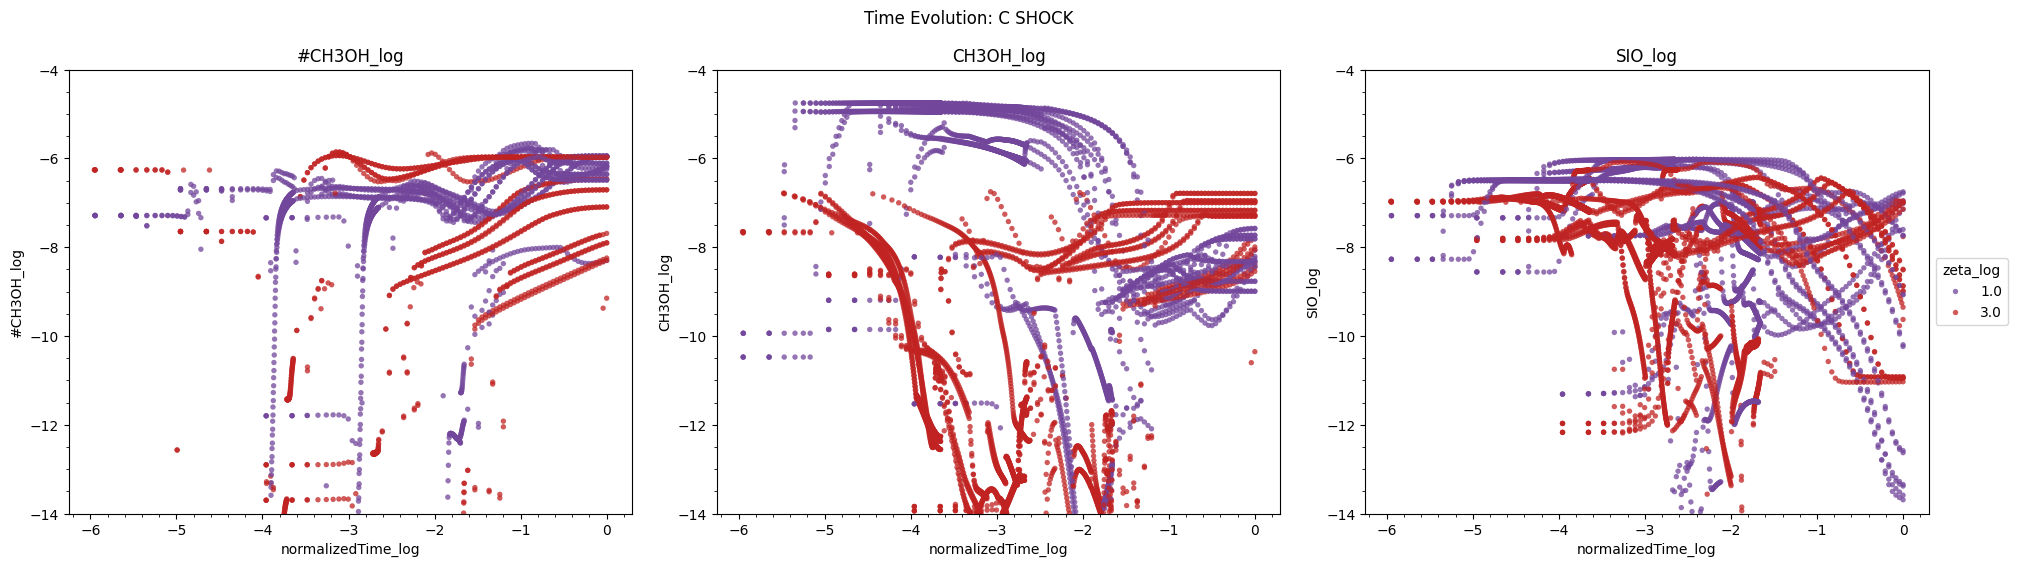

In [133]:
propList= [f'{prop}_log' for prop in species]
focus='zeta_log'
colormap= Plotting.myRnbw

fig, axs = plt.subplots(1,len(propList), figsize=(8*len(propList), 6))
fig.subplots_adjust(top=.85,wspace=0.15, hspace=0.05)

for i, prop in enumerate(propList):
    ax=axs[i]
    snsax=sns.scatterplot(df, x='normalizedTime_log', y=prop, ax=ax,
                hue=focus, palette=colormap, 
                linewidth=0, alpha=0.75, s=15,
                legend= None if i<len(propList)-1 else 'auto'
                )
    ax.set_ybound(-14,-4)
    ax.minorticks_on()
    ax.set_title(prop)

sns.move_legend(axs[len(propList)-1], 'center left', bbox_to_anchor=(1, 0.5))
fig.suptitle(f"Time Evolution: {tipo.upper()}", size='large', y=0.95)

# abundances

Text(0, 0, 'species\n#CH3OH_log    36\nCH3OH_log     36\nSIO_log       36\nName: abundance_log, dtype: int64')

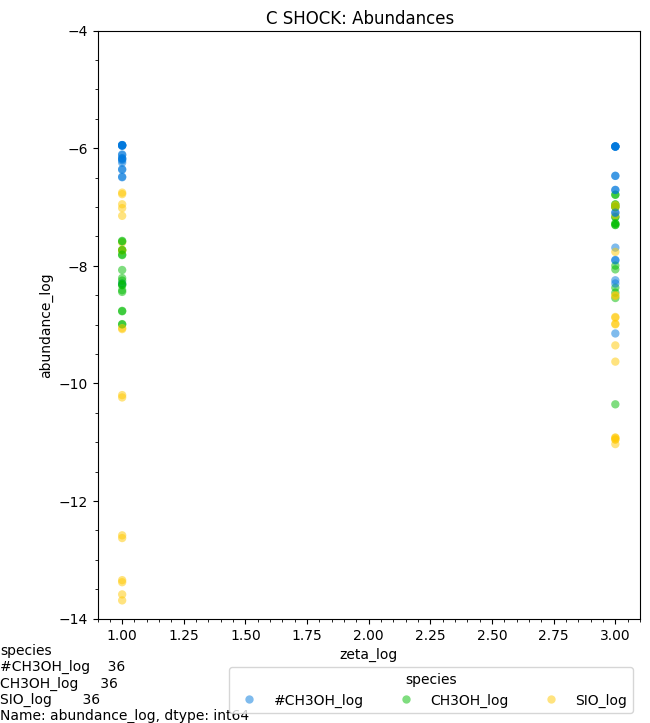

In [87]:
phys='zeta_log'

fig, ax = plt.subplots(figsize=(7,7))
fig.subplots_adjust(top=0.95)
sns.scatterplot(dfFinal, x=phys, y='abundance_log',
                hue='species', palette='nipy_spectral',
                linewidth=0, ax=ax, alpha=0.5,
                )
sns.move_legend(ax, "upper right", bbox_to_anchor=(1, -0.07), ncol=4)
ax.set_ybound(-14,-4)
ax.minorticks_on()
fig.suptitle(tipo.upper()+': Abundances')
ax.annotate(dfFinal.groupby(by=['species'])['abundance_log'].count(), xy=(0,0), xycoords='figure fraction', va='bottom', ha='left')

# misc

In [2]:
def checkFile(filePath):
    if not os.path.exists(filePath):
        newName=filePath.split('/')[-1]
        fold=filePath.split(newName)[0]
        tL= [f for f in os.listdir(fold) if newName.split('.dat')[0] in f]
        oldFileName=tL[0]
        os.rename(fold+oldFileName, filePath)

checkFile('/data2/gsampsonolalde/LEAPS-2024/Grid/2024-07-16_105046/modelData/1000.0_1000.0_10000000.0_100.0.dat')

In [3]:
folder = '/data2/gsampsonolalde/LEAPS-2024/Analysis/{}'
physical = {constants.SHOCK: ['Density', 'gasTemp', 'av', 'zeta', 'radfield', constants.SHOCKVEL],
            constants.HOTCORE: ['Density', 'gasTemp', 'av', 'zeta', 'radfield']}
species=['#CH3OH', 'CH3OH', '#SIO', 'SIO']

tipo=constants.SHOCK

In [4]:
df= Plotting.buildDataframe(tipo, folder, physical, species)
df['normalizedTime']= df['Time']/df.groupby('runName')['Time'].transform('max')

Text(0.5, 0.98, 'C SHOCK')

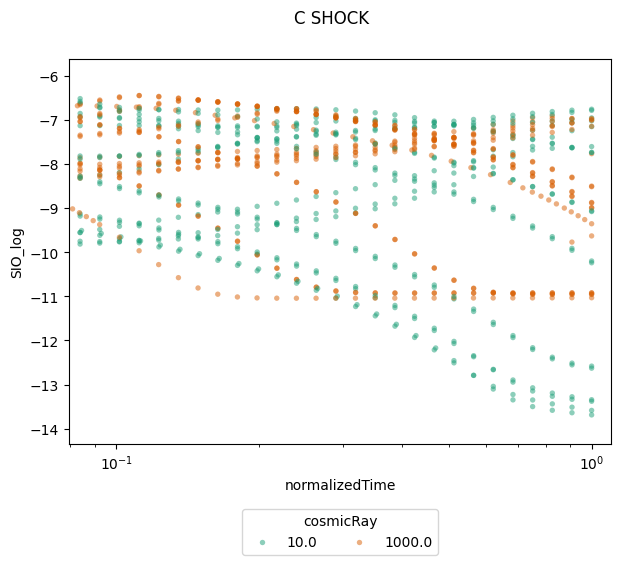

In [8]:
prop='SIO_log'

fig, ax = plt.subplots(figsize=(7,5))

sns.scatterplot(df, x='normalizedTime', y=prop, ax=ax,
                        hue='cosmicRay', palette='Dark2', 
                        linewidth=0, alpha=0.5, s=15
                        )
        
sns.move_legend(ax, "upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)
ax.set_xscale('log')
ax.set_xlim(right=1.1)
fig.suptitle(tipo.upper())

# old

In [28]:
def buildDataframe(tipo): 
    df= pd.read_csv(tipo+'.csv', index_col=0)

    df = df.loc[:,physical[tipo]+species+['runName']]
    for prop in physical[tipo]+species:
        with np.errstate(divide='ignore'): df[f'{prop}_log']=np.log10(df[prop])
    
    df=df.reset_index().drop(columns=['index'])
    df=df.join(pd.DataFrame(df['runName'].str.replace('.dat','').str.split('_').values.tolist(),
                            columns=constants.initparams[tipo]), rsuffix='_str')
    return df

In [29]:
folder = '/data2/gsampsonolalde/LEAPS-2024/Analysis/{}'
nameBase= folder.format('CorrelationPlots/')

In [30]:
myCmap=sns.diverging_palette(170, 330, l=65, center="dark", as_cmap=True)
physical = {constants.SHOCK: ['Time', 'Density', 'gasTemp', 'av', 'zeta', 'radfield', constants.SHOCKVEL],
            constants.HOTCORE: ['Time', 'Density', 'gasTemp', 'av', 'zeta', 'radfield']}
species=['#CH3OH', 'CH3OH', '#SIO', 'SIO']

In [31]:
tipo=constants.SHOCK

df=buildDataframe(tipo)

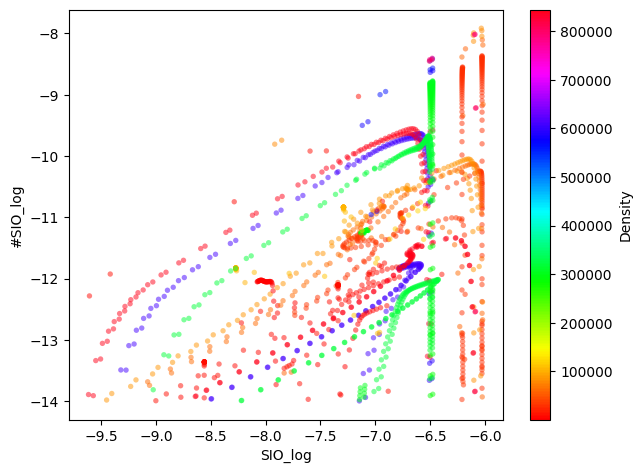

In [54]:
phys='SIO_log'
spec='#SIO_log'
focus='Density'

fig, ax = plt.subplots(figsize=(7,5))
fig.subplots_adjust(top=0.93)
snsax= sns.scatterplot(df,x=phys,y=spec, hue= focus, palette='hsv', linewidth=0, legend=None, alpha=0.5, s=15, ax=ax)

norm = plt.Normalize(df[focus].min(), df[focus].max())
sm = plt.cm.ScalarMappable(cmap="hsv", norm=norm)
sm.set_array([])
snsax.figure.colorbar(sm, ax=ax, label=focus)

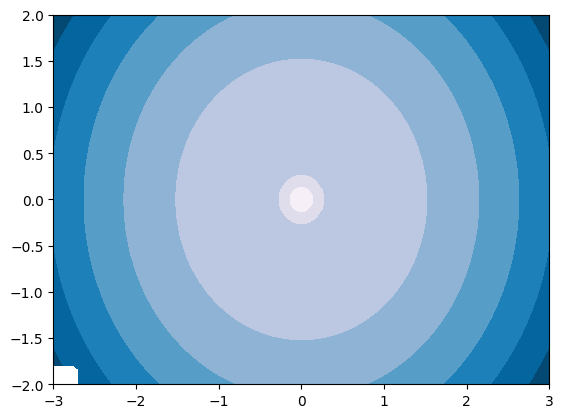

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma

from matplotlib import cm, ticker

N = 100
x = np.linspace(-3.0, 3.0, N)
y = np.linspace(-2.0, 2.0, N)

X, Y = np.meshgrid(x, y)

# A low hump with a spike coming out.
# Needs to have z/colour axis on a log scale, so we see both hump and spike.
# A linear scale only shows the spike.
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X * 10)**2 - (Y * 10)**2)
z = Z1 + 50 * Z2

# Put in some negative values (lower left corner) to cause trouble with logs:
z[:5, :5] = -1

# The following is not strictly essential, but it will eliminate
# a warning.  Comment it out to see the warning.
z = ma.masked_where(z <= 0, z)


# Automatic selection of levels works; setting the
# log locator tells contourf to use a log scale:
fig, ax = plt.subplots()
cs = ax.contourf(X, Y, z, locator=ticker.LogLocator(), cmap=cm.PuBu_r)

# cbar = fig.colorbar(cs)

plt.show()

# timeplot

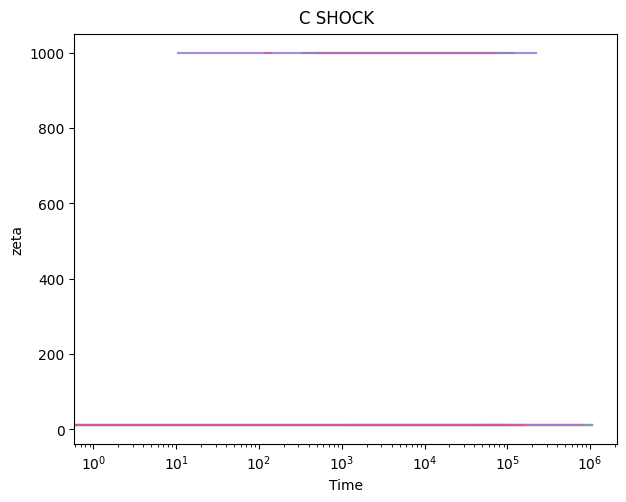

In [14]:
def timePlot(df, prop, tipo, nameBase):
    fig, ax = plt.subplots(figsize=(7,5))
    fig.subplots_adjust(top=0.93)
    sns.lineplot(df, x='Time', y=prop, 
                 hue='runName', palette='hls', 
                 alpha=0.5, legend=None, ax=ax)
    ax.set_xscale('log')
    fig.suptitle(tipo.upper())

    figName= '_'.join([nameBase,tipo.replace(' ','').upper(),constants.TIME,prop])+'.png'

timePlot(df,'zeta',tipo,'')

In [25]:
figName="/data2/gsampsonolalde/LEAPS-2024/Analysis/CorrelationPlots/scatter/CSHOCK_scatter_#SIO_log_SIO_log.png"

x='#SIO_log'
y='SIO_log'

altName=figName.replace(x,'asdfghjkl').replace(y,x).replace('asdfghjkl',y)

for i in range(4):
    if i%2==0: continue
    print(i)

1
3


# obtener tiempo rel

In [13]:
df['runName'].unique()

0        True
1        True
2        True
3        True
4        True
        ...  
1597    False
1598    False
1599    False
1600    False
1601    False
Name: runName, Length: 1602, dtype: bool

In [44]:
df=df.loc[:,['runName', 'Time']]

In [26]:
df['nTime']=df['Time']/df.groupby('runName')['Time'].transform('max')

# plots

(            #CH3OH_log   SIO_log  CH3OH_log
 #CH3OH_log    1.000000 -0.679158        NaN
 SIO_log      -0.679158  1.000000   0.810677
 CH3OH_log          NaN  0.810677   1.000000,
 <Figure size 800x600 with 2 Axes>)

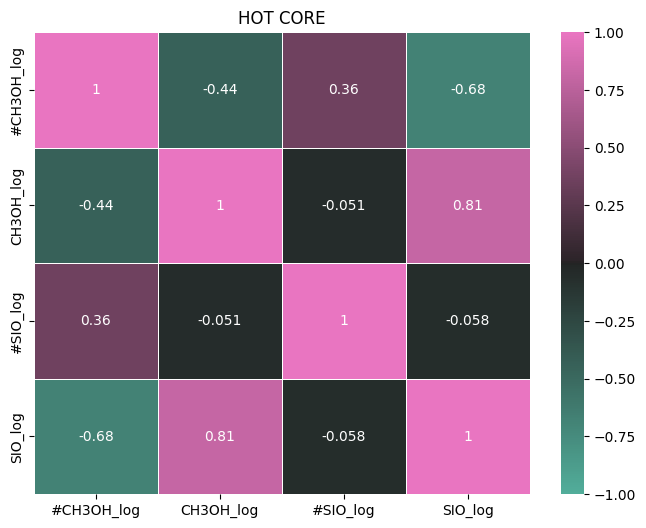

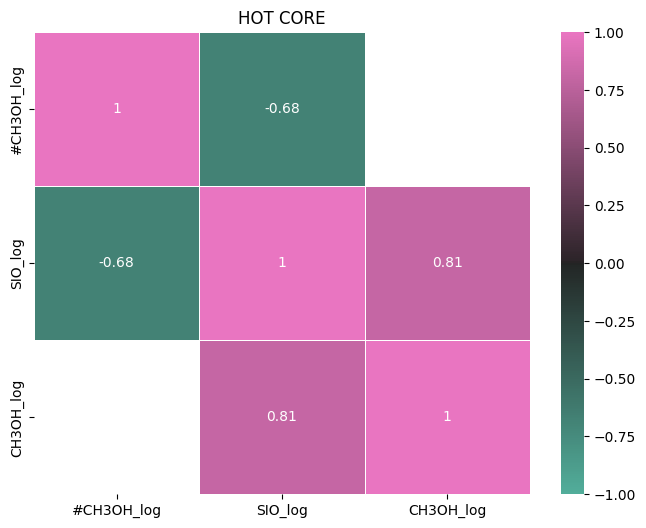

In [18]:
yaxis= [f'{prop}_log' for prop in species]
xaxis=yaxis

corr, fig = Plotting.corrGrid(df, xaxis, yaxis, tipo, 0)
xaxis, yaxis = Plotting.getCorrValues(corr)
Plotting.corrGrid(df, list(set(xaxis)), list(set(yaxis)), tipo, 0.5)

In [15]:
tipo=constants.HOTCORE

df=buildDataframe(tipo)

In [ ]:
fig = plt.figure()
axs=fig.add_subplot(111)

/data2/gsampsonolalde/uclchem_osx/lib/python3.9/site-packages/seaborn/axisgrid.py:1832: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/data2/gsampsonolalde/uclchem_osx/lib/python3.9/site-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/data2/gsampsonolalde/uclchem_osx/lib/python3.9/site-packages/seaborn/axisgrid.py:1889: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)
/data2/gsampsonolalde/uclchem_osx/lib/python3.9/site-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/data2/gsampsonolalde/uclchem_osx/lib/python3.9/site-packages/seaborn/axisgrid.py:1889: UserWarni

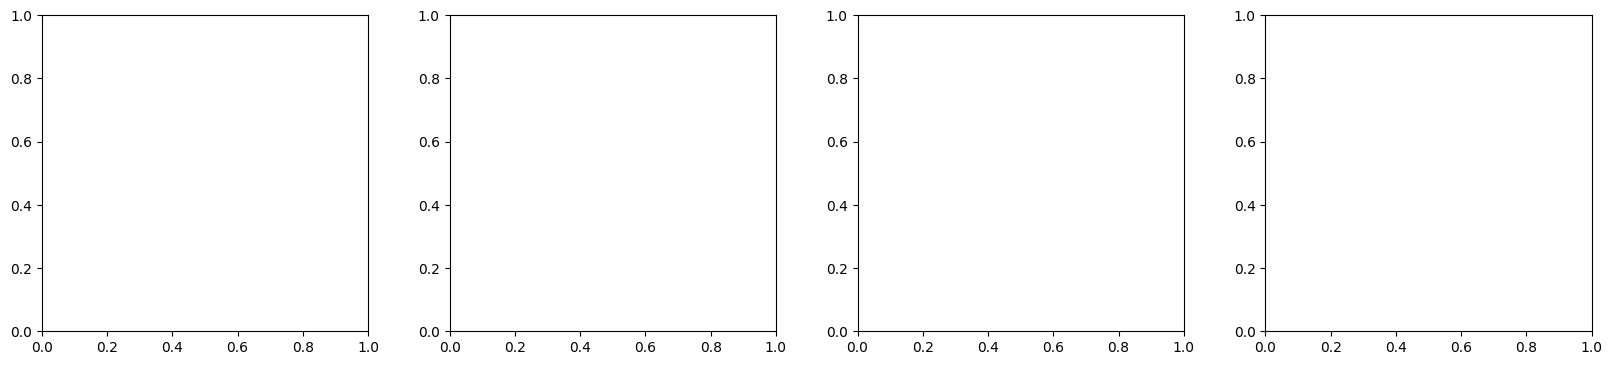

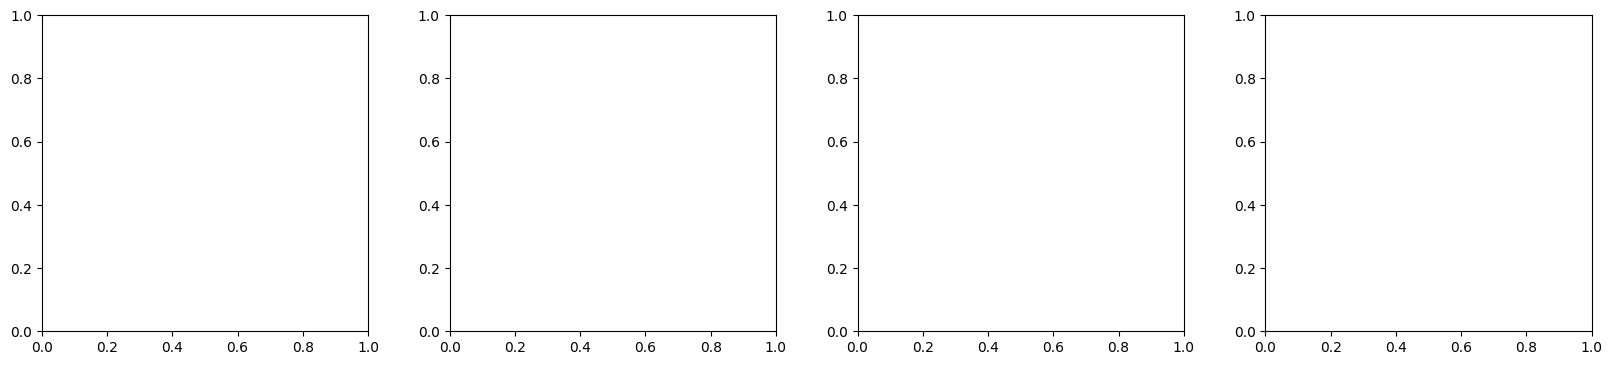

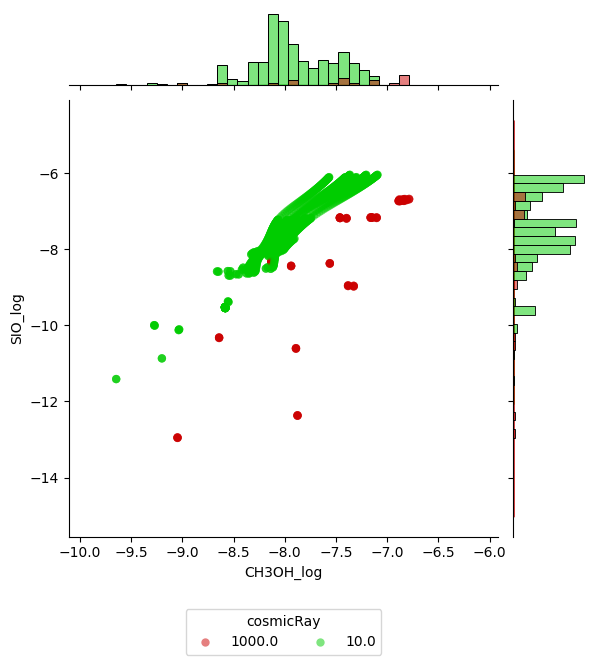

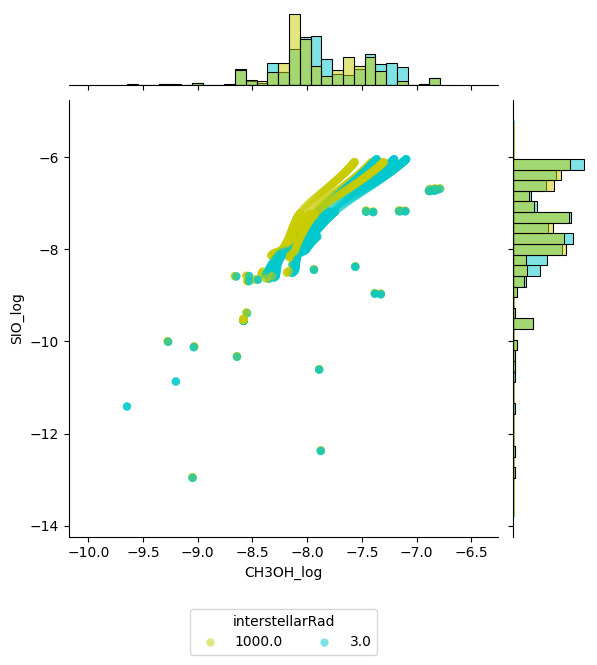

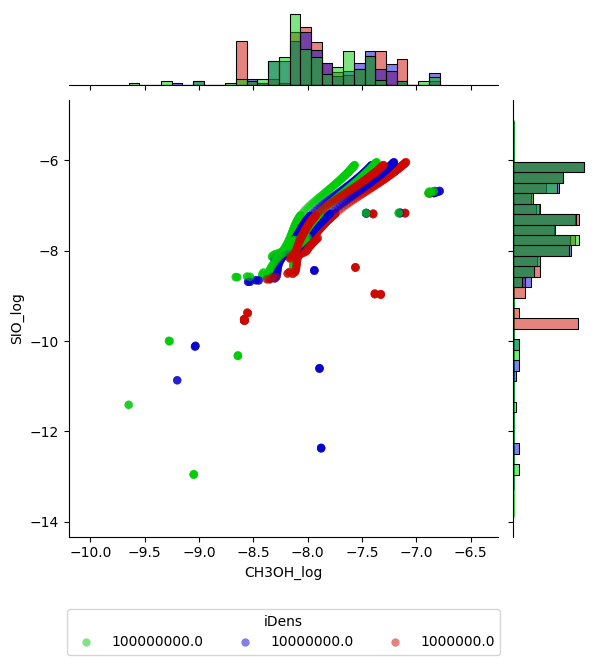

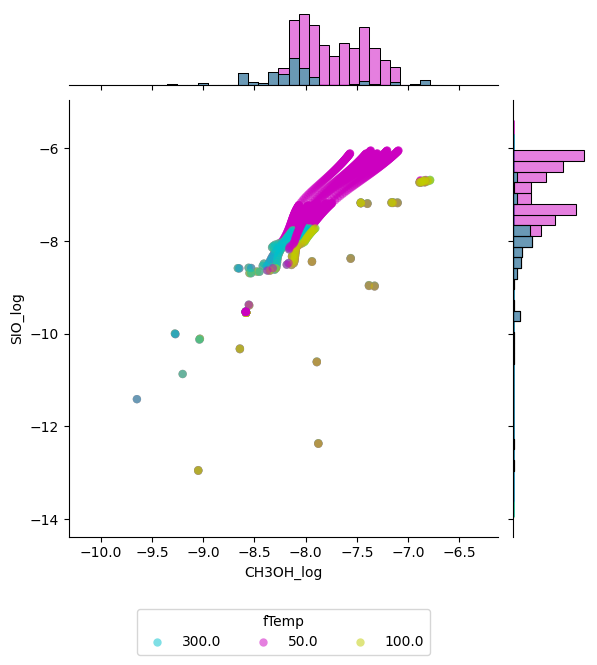

In [138]:
focusList=constants.initparams[tipo]

for j, focus in enumerate(focusList):
    f = sns.jointplot(df, y='SIO_log', x='CH3OH_log',
                    hue=focus, palette= sns.hls_palette(s=1, l=.4, h=j*.17, n_colors=3),
                    alpha=0.5, linewidth=0
                    )
    f.plot_marginals(sns.histplot, alpha=0.5)
    sns.move_legend(f.figure.axes[0], "upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)
    f.savefig

# correccion corr matrix

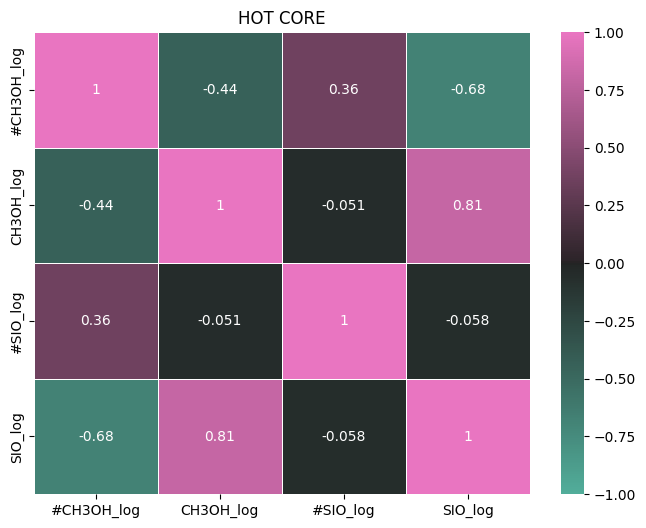

In [10]:
singleAxis=True
yaxis= [f'{prop}_log' for prop in species]
if singleAxis: xaxis=yaxis
else: xaxis= [f'{prop}_log' for prop in physical[tipo]]

figName=f"{'species_' if singleAxis else ''}CorrGrid_log_log.png"
corr, fig = Plotting.corrGrid(df, xaxis, yaxis, tipo, 0)

xaxis, yaxis = Plotting.getCorrValues(corr)

In [16]:
xaxis=list(set(xaxis))
yaxis=list(set(yaxis))

if xaxis.sort()==yaxis.sort(): singleAxis=True
else: singleAxis=False

print(singleAxis,xaxis, yaxis)

True ['#CH3OH_log', 'CH3OH_log', 'SIO_log'] ['#CH3OH_log', 'CH3OH_log', 'SIO_log']


<Axes: >

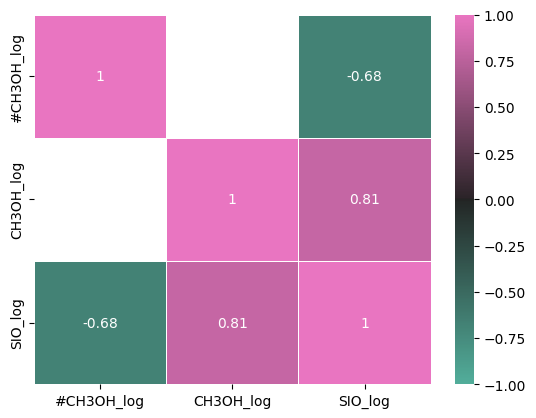

In [17]:
cor = df.loc[:,xaxis if singleAxis else xaxis+yaxis].corr()
cor=cor[cor.abs().ge(0.5)].loc[xaxis,yaxis].dropna(how='all').dropna(how='all', axis=1)
sns.heatmap(cor, vmin=-1, vmax=1, annot=True, cmap=myCmap, linewidths=.5)

In [ ]:
focusList=constants.initparams[tipo]

fig, axs = plt.subplots(1, len(focusList), figsize=(5*len(focusList),4))
fig.subplots_adjust(wspace=0.25,top=0.9)
spec='#SIO_log'
phys='gasTemp_log'

for j, focus in enumerate(focusList):
    sns.scatterplot(df,x=phys,y=spec, ax=axs[j],
                                hue= focus, palette=sns.hls_palette(s=1, l=.4, h=j*.17, n_colors=3),
                                linewidth=0, legend='full',
                                alpha=0.75, s=15
                                )
    # sns.lineplot(data=df, x=phys,y=spec, ax=axs[j],
    #                          hue= focus, palette='hls',
    #                          errorbar=lambda x: (x.min(), x.max()),
    #                          )
                
    sns.move_legend(axs[j], "upper center", bbox_to_anchor=(0.5, -0.15))

fig.suptitle(tipo.upper())

# break

In [28]:
singleAxis=False
nameBase=''
yaxis= [f'{prop}_log' for prop in species]
xaxis= [f'{prop}_log' for prop in physical[tipo]]

corr, fig = Plotting.corrGrid(df, xaxis, yaxis, tipo, 0)
xaxis, yaxis = Plotting.getCorrValues(corr, singleAxis)
plt.close()

In [33]:
def isValid(x, y):
    phases=['#','@','$']
    if x==y: return False
    elif 'Time' in x or 'Time' in y: return False
    elif x.strip('#@$')==y.strip('#@$'): return True
    for sym in phases:
        if sym in x and sym in y: return True
    return False

for i, y in enumerate(yaxis):
    if not isValid(xaxis[i], y): print(xaxis[i],y)

#CH3OH_log Time_log
CH3OH_log Time_log
SIO_log Time_log
SIO_log gasTemp_log
#SIO_log radfield_log


<Axes: xlabel='gasTemp_log', ylabel='SIO_log'>

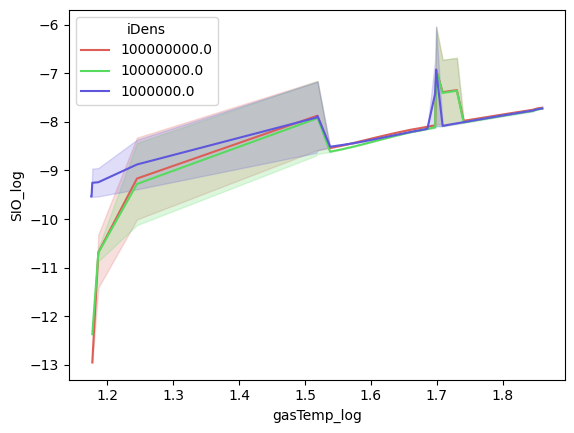

In [21]:
sns.lineplot(data=df, x="gasTemp_log", y="SIO_log", hue=constants.IDENS, palette='hls',
             errorbar=lambda x: (x.min(), x.max()))

# good scatter plot for species combination

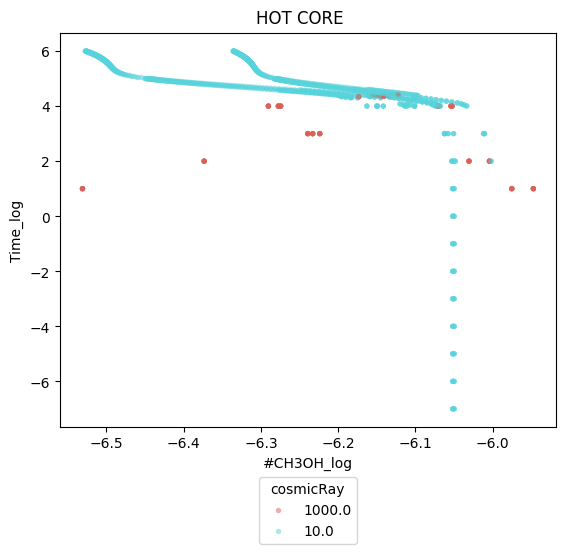

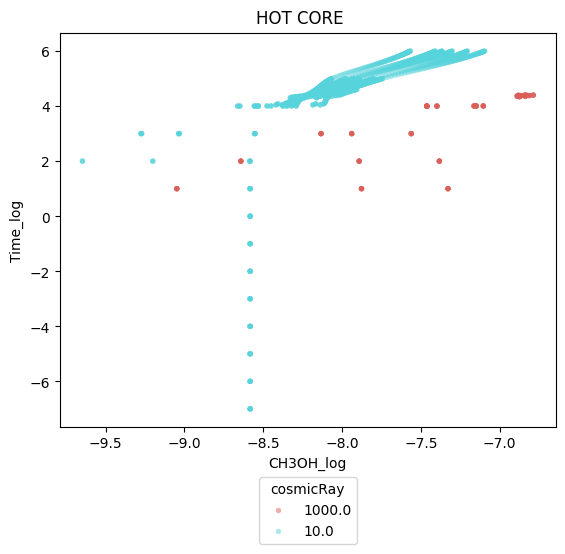

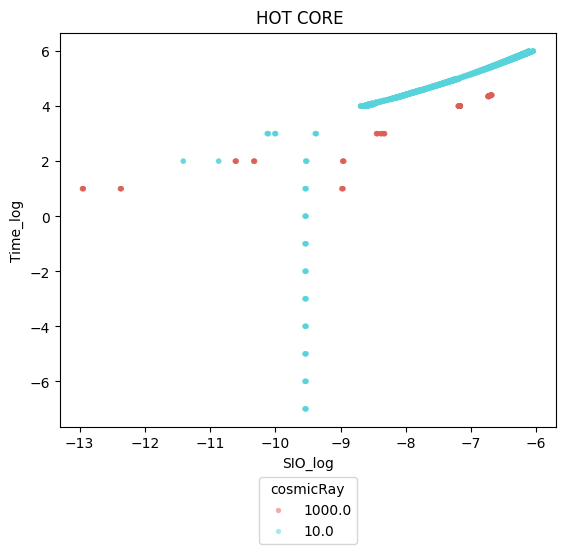

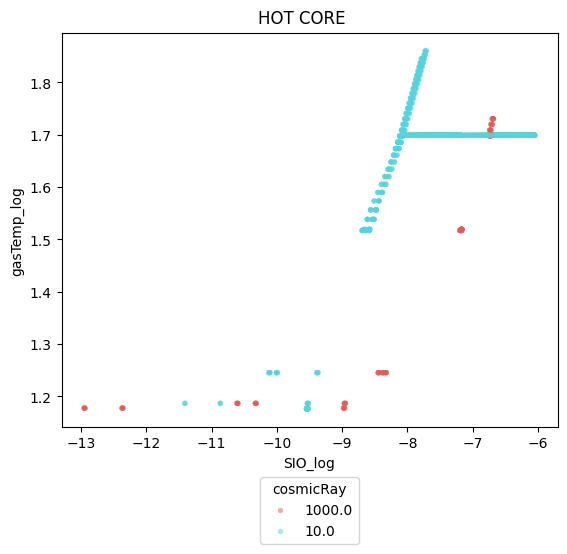

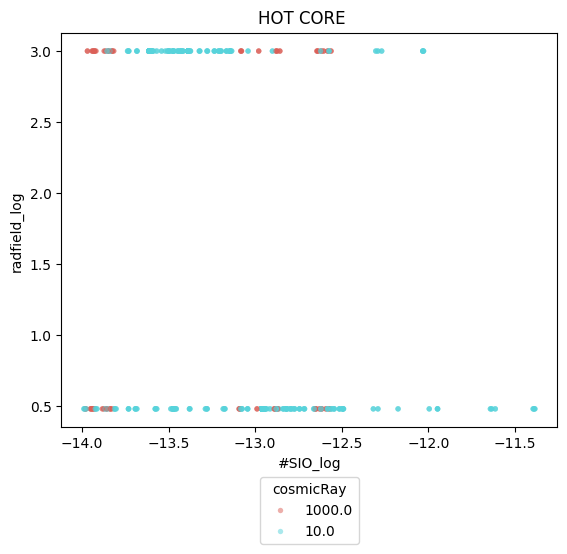

In [78]:
cosmicRay, interstellarRad, iDens, propio = constants.initparams[tipo]
for i, phys in enumerate(xaxis):
    fig = plt.figure()
    ax=fig.add_subplot(111)
    fig.subplots_adjust(top=0.93)

    spec=yaxis[i]
    figName=nameBase+phys+'_'+spec+'_'+'.png'

    ax=sns.scatterplot(df,x=phys,y=spec,
                        hue= cosmicRay,
                        palette='hls', 
                        linewidth=0, legend='full',
                        alpha=0.5, s=15
                        )
    sns.move_legend(ax, "upper center", bbox_to_anchor=(0.5, -0.11))
    fig.suptitle(tipo.upper())

# Primer intento

In [16]:
def getCorrMatrix(df, tipo, singleAxis):
    xaxis=[f'{prop}_log' for prop in species]
    yaxis= xaxis if singleAxis else [f'{prop}_log' for prop in physical[tipo]]

    cor = df.loc[:,xaxis if singleAxis else xaxis+yaxis].corr()
    cor=cor[cor.abs().ge(0.5)].loc[xaxis,yaxis].dropna(how='all').dropna(how='all', axis=1)
    return cor

In [17]:
def isValid(x, y):
    phases=['#','@','$']
    if x==y: return False
    elif x.strip('#@$')==y.strip('#@$'): return True
    for sym in phases:
        if sym in x and sym in y: return True
    return False

def getCorrValues(df, tipo, corrList, singleAxis):
    cor=getCorrMatrix(df, tipo, singleAxis)

    for i in cor.index:
        for j in cor.columns:
            if not np.isnan(cor.loc[i,j]):
                x=j.replace('_log','')
                y=i.replace('_log','')
                if singleAxis:
                    if isValid(x,y): corrList.append(pd.DataFrame(data={'tipo': tipo, 'x': x, 'y': y, 'coef': cor.loc[i,j]}, index=[0]))
                else: corrList.append(pd.DataFrame(data={'tipo': tipo, 'x': x, 'y': y, 'coef': cor.loc[i,j]}, index=[0]))

In [ ]:
corrList=[]
for tipo in physical:
    df=buildDataframe(tipo)
    for singleAxis in [False, True]:
        Plotting.getCorrValues(df, tipo, corrList, singleAxis)

corrs=pd.concat(corrList, ignore_index=True)

# pruebas

In [56]:
tipo=constants.SHOCK

df=buildDataframe(tipo)
df

In [ ]:
yaxis= [f'{prop}_log' for prop in species]
if singleAxis: xaxis=yaxis
else: xaxis= [f'{prop}_log' for prop in physical[tipo]]

corr, fig = Plotting.corrGrid(df, xaxis, yaxis, tipo, 0)
xaxis, yaxis = Plotting.getCorrValues(corr, singleAxis)

In [22]:
xaxis = [prop.replace('_log','') for prop in xaxis]
yaxis = [prop.replace('_log','') for prop in yaxis]


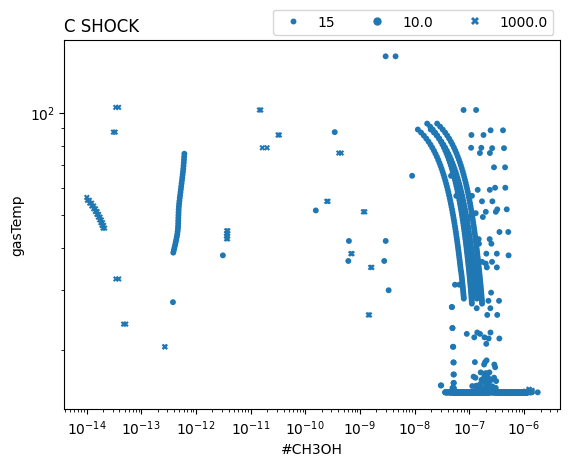

In [52]:
title=tipo
logxscale=False
logyscale=False

for i, phys in enumerate(xaxis):
    spec=yaxis[i]
    ax=sns.scatterplot(df,x=phys,y=spec,
                    # hue='zeta', palette='Spectral',
                    style='zeta',
                    linewidth=0, size=15
                    )
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend(loc='upper right',ncols=6, bbox_to_anchor=(1, 1.1))
    ax.set_title(title.upper(), loc='left')